In [1]:
import pandas as pd
import numpy as np
import glob
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import datetime

In [2]:
exchange_path = sorted(glob.glob('./../data/exchange/*'))
exchange_CAD = pd.read_csv(exchange_path[5])
exchange_CAD

,Unnamed: 0,date,buy,standard
0,0,2022-05-02,1004.31,985.02
1,1,2022-04-29,1007.30,991.06
2,2,2022-04-28,1012.69,985.26
3,3,2022-04-27,1004.85,974.44
4,4,2022-04-26,1002.96,979.12
...,...,...,...,...
4617,4617,2003-09-30,869.25,850.17
4618,4618,2003-09-29,862.23,850.62
4619,4619,2003-09-26,867.33,853.30
4620,4620,2003-09-25,870.15,853.83


In [3]:
interest_path = sorted(glob.glob('./../data/interest/*'))
interest = pd.read_csv(interest_path[0])
interest_CAD = interest.iloc[5:]
interest_CAD

,Unnamed: 0,date,interest,change
5,5,2022-05-02,1.908,2.14
6,6,2022-04-29,1.868,3.89
7,7,2022-04-28,1.798,2.98
8,8,2022-04-27,1.746,6.72
9,9,2022-04-26,1.636,1.74
...,...,...,...,...
5682,4995,2003-09-30,4.920,1.65
5683,4996,2003-09-29,4.840,-0.31
5684,4997,2003-09-26,4.855,0.21
5685,4998,2003-09-25,4.845,-0.72


In [21]:
inflation = pd.read_excel('./../data/2차/inflation/inflation.xlsx')
inflation.iloc[:,643:]
# inflation_CAD = inflation.iloc[3, 644:]
inflation_CAD = inflation.iloc[3, 400:]
inflation_CAD # 2003-07 부터 2022-03까지

Unnamed: 644    0.097561
Unnamed: 645    0.292398
Unnamed: 646    0.194363
Unnamed: 647    -0.29098
Unnamed: 648    0.291829
                  ...   
Unnamed: 864    0.208478
Unnamed: 865   -0.138696
Unnamed: 866    0.902778
Unnamed: 867    1.032347
Unnamed: 868    1.430518
Name: 3, Length: 225, dtype: object

In [5]:
inflation2 = pd.read_excel('./../data/2차/inflation/inflation_c.xlsx')
# inflation2 = inflation2.iloc[2,646:]
inflation2 = inflation2.iloc[2,400:]

In [6]:
liquidity = pd.read_excel('./../data/2차/Liquidity/canada_Liquidity.xlsx')
date = liquidity.iloc[6,47:]
liquidity.iloc[:,47:]

,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,...,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2003M07,2003M08,2003M09,2003M10,2003M11,2003M12,2004M01,2004M02,2004M03,2004M04,...,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03
7,35654.467458,35224.651622,36610.723079,35788.592264,36054.079623,36222.100799,36323.415551,35938.921518,36365.514774,35064.356252,...,89053.334543,90198.499889,106538.505867,106175.639454,104169.32078,103626.563078,106615.11957,104402.24878,102889.214424,103763.679863
8,761.216936,765.131559,794.312373,795.415534,817.045203,838.018864,835.39213,846.765166,847.015895,830.533778,...,8670.431757,8684.702808,24090.933214,23830.707365,24267.015684,24017.658839,23997.052864,23863.124151,23916.252066,23982.70038
9,4095.250521,3784.520063,3970.410707,3946.17673,3993.03442,3847.081935,3835.023421,3704.156352,3601.498879,3409.822474,...,4444.902786,4500.79708,4486.572653,4409.93209,4430.305097,4472.904239,4469.066706,4444.124629,4453.962358,4393.979482


In [7]:
date = date.astype('str')
for i, d in enumerate(date):
    date[i] = d[:4] + d[4:].replace('0','')
date

Unnamed: 47      2003M7
Unnamed: 48      2003M8
Unnamed: 49      2003M9
Unnamed: 50      2003M1
Unnamed: 51     2003M11
                 ...   
Unnamed: 267    2021M11
Unnamed: 268    2021M12
Unnamed: 269     2022M1
Unnamed: 270     2022M2
Unnamed: 271     2022M3
Name: 6, Length: 225, dtype: object

In [8]:
liquidity_temp = liquidity.iloc[7,46:].to_list()
liquidity_temp1 = liquidity_temp[:len(liquidity_temp)-1]
liquidity_temp2 = liquidity_temp[1:]
liquidity_CAD = []
for after, before in zip(liquidity_temp1, liquidity_temp2):
    liquidity_CAD.append(((after-before) /  before) * 100)
liquidity_CAD

[2.6285747403677813,
 1.2202131632389444,
 -3.7859712693450684,
 2.2971867942460666,
 -0.736358721259153,
 -0.4638636967614408,
 -0.2789240776901291,
 1.0698541226901308,
 -1.173070858674225,
 3.710772594053005,
 -2.4181240244025672,
 1.58250171598328,
 0.6230157983809141,
 -1.9225545564569562,
 -1.026296569717264,
 -0.5457765126952892,
 6.99866381677743,
 -1.1515155747036037,
 -0.334901470130292,
 -2.731757045692267,
 -1.8920086008987065,
 1.8084321431658426,
 1.6199798588926833,
 0.325311643589956,
 4.787585633360514,
 -2.8292862659908917,
 2.099889696001395,
 -1.8033211723720428,
 0.05418379459917946,
 3.588187549098596,
 0.19825900048910466,
 0.8384029074445489,
 -9.294475388233547,
 0.8985022131263491,
 0.09260062607581572,
 -0.6490546842089296,
 -1.3109858002116925,
 1.4998447535568613,
 -0.4652860316091671,
 1.056772219625516,
 -2.2833492432264726,
 4.040576890796182,
 -2.352306627929137,
 -1.1056997973855371,
 -7.629572326064792,
 -2.190093808892396,
 0.21177035011090578,
 1.73

In [9]:
from statsmodels.tsa.base.datetools import dates_from_str

monthly = dates_from_str(date)
monthly

[datetime.datetime(2003, 7, 31, 0, 0),
 datetime.datetime(2003, 8, 31, 0, 0),
 datetime.datetime(2003, 9, 30, 0, 0),
 datetime.datetime(2003, 1, 31, 0, 0),
 datetime.datetime(2003, 11, 30, 0, 0),
 datetime.datetime(2003, 12, 31, 0, 0),
 datetime.datetime(2004, 1, 31, 0, 0),
 datetime.datetime(2004, 2, 29, 0, 0),
 datetime.datetime(2004, 3, 31, 0, 0),
 datetime.datetime(2004, 4, 30, 0, 0),
 datetime.datetime(2004, 5, 31, 0, 0),
 datetime.datetime(2004, 6, 30, 0, 0),
 datetime.datetime(2004, 7, 31, 0, 0),
 datetime.datetime(2004, 8, 31, 0, 0),
 datetime.datetime(2004, 9, 30, 0, 0),
 datetime.datetime(2004, 1, 31, 0, 0),
 datetime.datetime(2004, 11, 30, 0, 0),
 datetime.datetime(2004, 12, 31, 0, 0),
 datetime.datetime(2005, 1, 31, 0, 0),
 datetime.datetime(2005, 2, 28, 0, 0),
 datetime.datetime(2005, 3, 31, 0, 0),
 datetime.datetime(2005, 4, 30, 0, 0),
 datetime.datetime(2005, 5, 31, 0, 0),
 datetime.datetime(2005, 6, 30, 0, 0),
 datetime.datetime(2005, 7, 31, 0, 0),
 datetime.datetime(20

In [22]:
data = pd.DataFrame({'liquidity' : liquidity_CAD, 'inflation' : inflation_CAD.to_list()})
data.index = pd.DatetimeIndex(monthly)
data

,liquidity,inflation
2003-07-31,2.628575,0.097561
2003-08-31,1.220213,0.292398
2003-09-30,-3.785971,0.194363
2003-01-31,2.297187,-0.290980
2003-11-30,-0.736359,0.291829
...,...,...
2021-11-30,0.523763,0.208478
2021-12-31,-2.803126,-0.138696
2022-01-31,2.119562,0.902778
2022-02-28,1.470547,1.032347


In [23]:
model = VAR(data)
results = model.fit(1)
results.summary()

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, May, 2022
Time:                     09:24:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  0.0120324
Nobs:                     224.000    HQIC:                -0.0424641
Log likelihood:          -620.797    FPE:                   0.923719
AIC:                   -0.0793509    Det(Omega_mle):        0.899465
--------------------------------------------------------------------
Results for equation liquidity
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.534004         0.189997           -2.811           0.005
L1.liquidity         0.001325         0.067296            0.020           0.984
L1.inflation         0.580351         0.473439            1.

In [24]:
# 최적 lag수 구하기

model.select_order(10)
results = model.fit(maxlags=10, ic='aic')
results, results.k_ar

(<statsmodels.tsa.vector_ar.var_model.VARResultsWrapper at 0x10632d520>, 1)

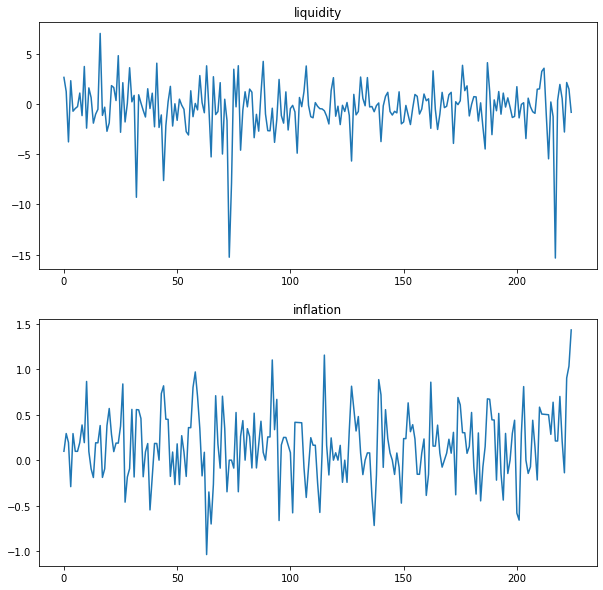

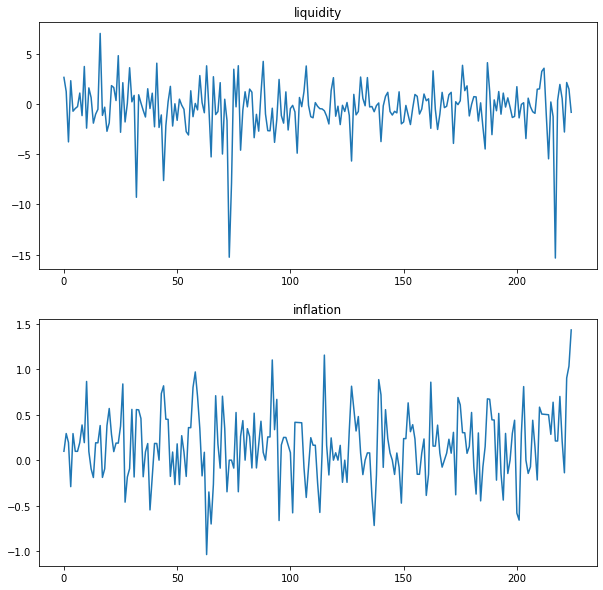

In [25]:
results.plot()

In [26]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series( dftest[0:4], index=[ "Test Statistic", "p-value", "#Lags Used", "Number of Observations Used", ], )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
        print(dfoutput)

In [18]:
adf_test(inflation_CAD.to_list())

Results of Dickey-Fuller Test:
Test Statistic                  -3.450504
p-value                          0.009353
#Lags Used                      11.000000
Number of Observations Used    457.000000
Critical Value (1%)             -3.444740
dtype: float64
Test Statistic                  -3.450504
p-value                          0.009353
#Lags Used                      11.000000
Number of Observations Used    457.000000
Critical Value (1%)             -3.444740
Critical Value (5%)             -2.867885
dtype: float64
Test Statistic                  -3.450504
p-value                          0.009353
#Lags Used                      11.000000
Number of Observations Used    457.000000
Critical Value (1%)             -3.444740
Critical Value (5%)             -2.867885
Critical Value (10%)            -2.570150
dtype: float64


In [27]:
adf_test(inflation_CAD.to_list())

Results of Dickey-Fuller Test:
Test Statistic                  -2.141752
p-value                          0.228061
#Lags Used                      11.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
dtype: float64
Test Statistic                  -2.141752
p-value                          0.228061
#Lags Used                      11.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
dtype: float64
Test Statistic                  -2.141752
p-value                          0.228061
#Lags Used                      11.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
Critical Value (10%)            -2.574054
dtype: float64


In [20]:
adf_test(inflation2.to_list())

Results of Dickey-Fuller Test:
Test Statistic                  -2.447565
p-value                          0.128759
#Lags Used                      12.000000
Number of Observations Used    456.000000
Critical Value (1%)             -3.444772
dtype: float64
Test Statistic                  -2.447565
p-value                          0.128759
#Lags Used                      12.000000
Number of Observations Used    456.000000
Critical Value (1%)             -3.444772
Critical Value (5%)             -2.867899
dtype: float64
Test Statistic                  -2.447565
p-value                          0.128759
#Lags Used                      12.000000
Number of Observations Used    456.000000
Critical Value (1%)             -3.444772
Critical Value (5%)             -2.867899
Critical Value (10%)            -2.570157
dtype: float64


In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [63]:
df1 = exchange_CAD[['date', 'buy']]
df1.isnull().sum()

date    0
buy     0
dtype: int64

In [64]:
df2 = interest_CAD[['date', 'interest']]
df2.isnull().sum()

date        0
interest    0
dtype: int64

In [71]:
merge_left = pd.merge(df1,df2, how='left', left_on='date', right_on='date', sort = True)
merge_left

,date,buy,interest
0,2003-09-24,865.35,4.880
1,2003-09-25,870.15,4.845
2,2003-09-26,867.33,4.855
3,2003-09-29,862.23,4.840
4,2003-09-30,869.25,4.920
...,...,...,...
4617,2022-04-26,1002.96,1.636
4618,2022-04-27,1004.85,1.746
4619,2022-04-28,1012.69,1.798
4620,2022-04-29,1007.30,1.868


<AxesSubplot:xlabel='date'>

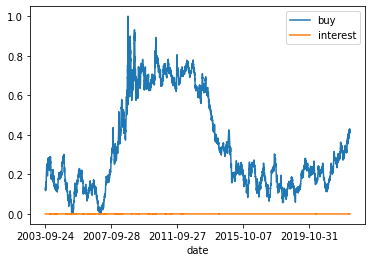

In [89]:
merge_left['buy'] = MinMaxScaler(merge_left['buy'])
merge_left['interest'] = merge_left['interest'] /100
merge_left = merge_left.set_index('date')
merge_left.plot()

In [90]:
dfx = merge_left[['buy', 'interest']]
dfy = dfx[['buy']]

window_size = 5
data_size = 2

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='relu', return_sequences=False, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=5, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False, clipvalue=0.5)
model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['buy'].iloc[-1] * pred_y[-1] / dfy.buy.iloc[-1], 'CAD/KRW')

[[0.4063907572763326, 1.608e-06], [0.41004501432842644, 1.6359999999999999e-06], [0.4139691880945955, 1.7459999999999999e-06], [0.4302472422357413, 1.798e-06], [0.4190560800137034, 1.8680000000000002e-06]] -> [0.41284799558997565]


ValueError: Input 0 of layer "lstm_49" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 5)

In [56]:
print("Tomorrow's exchange rate :", merge_left['buy'].iloc[-1] * pred_y[-1] / dfy.buy.iloc[-1], 'CAD/KRW')

Tomorrow's exchange rate : [nan] CAD/KRW


In [54]:
merge_left['buy'].iloc[-1]

1004.31

In [78]:
import keras

class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

[[0.40639075727633667, 0.22180886436890487], [0.41004501432843055, 0.2256640153324861], [0.41396918809459965, 0.24080925126084085], [0.43024724223574556, 0.2479688173360631], [0.4190560800137076, 0.2576066947450162]] -> [0.41284799558997975]
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 5, 10)             520       
                                                                 
 dropout_42 (Dropout)        (None, 5, 10)             0         
                                                                 
 lstm_47 (LSTM)              (None, 10)                840       
                                                                 
 dropout_43 (Dropout)        (None, 10)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
         

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-13 14:43:45.024878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 10s 77ms/step - loss: 3.3489e-08
Epoch 2/5
108/108 [==============================] - 9s 85ms/step - loss: 3.3489e-08
Epoch 3/5
108/108 [==============================] - 9s 84ms/step - loss: 3.3489e-08
Epoch 4/5
108/108 [==============================] - 9s 81ms/step - loss: 3.3489e-08
Epoch 5/5
108/108 [==============================] - 8s 74ms/step - loss: 3.3489e-08


2022-05-13 14:44:29.121676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


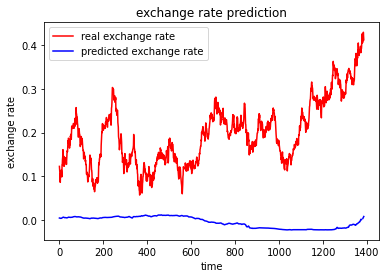

Tomorrow's exchange rate : [0.0072807] CAD/KRW


In [86]:
dfx = merge_left[['buy', 'interest']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['buy']]

window_size = 5
data_size = 2

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='linear', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='linear'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.2, amsgrad=False, clipvalue=1)
model.compile(optimizer=adam, loss='categorical_crossentropy')
model.fit(train_x, train_y, epochs=5, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['buy'].iloc[-1] * pred_y[-1] / dfy.buy.iloc[-1], 'CAD/KRW')

In [87]:
print("Tomorrow's exchange rate :", merge_left['buy'].iloc[-1] * pred_y[-1], 'CAD/KRW')

Tomorrow's exchange rate : [0.00300582] CAD/KRW
